In [13]:
import pandas as pd
import numpy
import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

dataset = 'winemag-data_first150k.csv'



In [4]:
df = pd.read_csv(dataset)

In [5]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [7]:
df.corr()

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_88011/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_88011/3064777509.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html


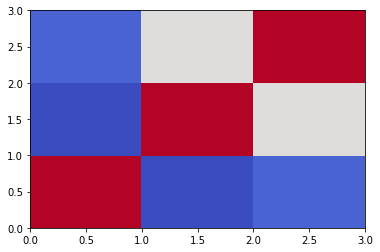

In [8]:
import matplotlib.pyplot as plot
# this is plotting the correlation on heat map (higher corelation is reds, can be seen by the line that is 1 when each is plotted against eachother)
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [9]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [18]:
headers = ['pos','neg','neu','compound']
texts = df["description"]
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['description']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['description']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['description']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['description']]

In [30]:
df.head(10)
df.describe()
df.shape

(150930, 15)

In [20]:
df.corr()

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_88011/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,points,price,compound,neg,neu,pos
Unnamed: 0,1.000000,-0.094197,-0.036687,0.036999,0.027578,-0.055077,0.044813
points,-0.094197,1.000000,0.459863,0.352816,-0.218913,-0.117234,0.194545
price,-0.036687,0.459863,1.000000,0.088946,-0.021196,-0.022060,0.029626
compound,0.036999,0.352816,0.088946,1.000000,-0.504967,-0.639987,0.815565
neg,0.027578,-0.218913,-0.021196,-0.504967,1.000000,-0.159075,-0.199189
neu,-0.055077,-0.117234,-0.022060,-0.639987,-0.159075,1.000000,-0.935794
pos,0.044813,0.194545,0.029626,0.815565,-0.199189,-0.935794,1.000000


/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_88011/2567592661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html


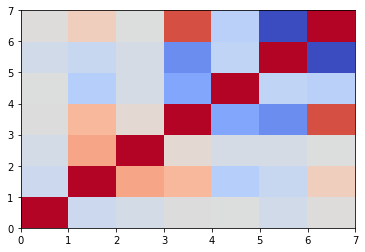

In [21]:
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [23]:
correlation_rating = df[df.columns[1:]].corr()['points'][:-1]

correlation_rating.sort_values(ascending=False).head(10)

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_88011/2076139341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_rating = df[df.columns[1:]].corr()['points'][:-1]


points      1.000000
price       0.459863
compound    0.352816
neu        -0.117234
neg        -0.218913
Name: points, dtype: float64

In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame


from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

# 60 is the y-->10th column for our purposes


x_train = train.iloc[0:,0:15]
y_train = train[[15]]
x_test = test.iloc[0:,0:15]
y_test = test[[15]]

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy') # choosing entropy as decsions
model.fit(x_train,y_train)

KeyError: "None of [Int64Index([15], dtype='int64')] are in the [columns]"